In [55]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [56]:
#Import Dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [57]:
y = y.reshape(len(y),1)

In [58]:
#Feature Scalling
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [59]:
#Train SVR model on the whole datase
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\rendy\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [65]:
#Predict a new result
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

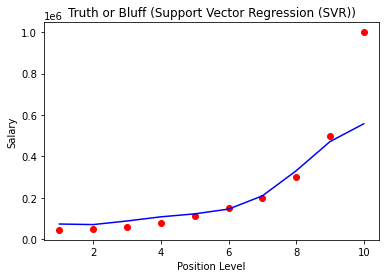

In [86]:
#Visualize SVR result
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression (SVR))')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

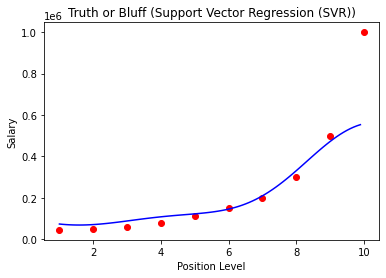

In [91]:
#Visualize SVR result (Higher Resolution and Smoother Curve)
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(X)), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression (SVR))')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()